# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 7196 substitutions for model Model(time=Time.discrete, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=1)


  0% (   1 of 7196) |             | Elapsed Time: 0:00:36 ETA:  2 days, 23:57:51

  0% (  55 of 7196) |                      | Elapsed Time: 0:00:37 ETA:  0:01:41

  1% (  90 of 7196) |                      | Elapsed Time: 0:00:37 ETA:  0:01:48

  1% ( 143 of 7196) |                      | Elapsed Time: 0:00:38 ETA:  0:01:43

  2% ( 180 of 7196) |                      | Elapsed Time: 0:00:39 ETA:  0:01:41

  3% ( 234 of 7196) |                      | Elapsed Time: 0:00:40 ETA:  0:01:38

  3% ( 270 of 7196) |                      | Elapsed Time: 0:00:41 ETA:  0:01:39

  4% ( 320 of 7196) |                      | Elapsed Time: 0:00:42 ETA:  0:01:38

  5% ( 360 of 7196) |#                     | Elapsed Time: 0:00:43 ETA:  0:01:38

  5% ( 410 of 7196) |#                     | Elapsed Time: 0:00:44 ETA:  0:01:37

  6% ( 450 of 7196) |#                     | Elapsed Time: 0:00:44 ETA:  0:01:37

  6% ( 499 of 7196) |#                     | Elapsed Time: 0:00:45 ETA:  0:01:35

  7% ( 540 of 7196) |#                     | Elapsed Time: 0:00:46 ETA:  0:01:35

  8% ( 590 of 7196) |#                     | Elapsed Time: 0:00:47 ETA:  0:01:36

  8% ( 630 of 7196) |#                     | Elapsed Time: 0:00:48 ETA:  0:01:36

  9% ( 682 of 7196) |##                    | Elapsed Time: 0:00:49 ETA:  0:01:34

 10% ( 720 of 7196) |##                    | Elapsed Time: 0:00:50 ETA:  0:01:32

 10% ( 773 of 7196) |##                    | Elapsed Time: 0:00:51 ETA:  0:01:30

 11% ( 810 of 7196) |##                    | Elapsed Time: 0:00:51 ETA:  0:01:28

 11% ( 860 of 7196) |##                    | Elapsed Time: 0:00:52 ETA:  0:01:28

 12% ( 900 of 7196) |##                    | Elapsed Time: 0:00:53 ETA:  0:01:26

 13% ( 957 of 7196) |##                    | Elapsed Time: 0:00:54 ETA:  0:01:23

 13% ( 990 of 7196) |###                   | Elapsed Time: 0:00:55 ETA:  0:01:21

 14% (1042 of 7196) |###                   | Elapsed Time: 0:00:56 ETA:  0:01:20

 15% (1080 of 7196) |###                   | Elapsed Time: 0:00:57 ETA:  0:01:19

 15% (1129 of 7196) |###                   | Elapsed Time: 0:00:58 ETA:  0:01:20

 16% (1170 of 7196) |###                   | Elapsed Time: 0:00:58 ETA:  0:01:20

 16% (1222 of 7196) |###                   | Elapsed Time: 0:00:59 ETA:  0:01:19

 17% (1260 of 7196) |###                   | Elapsed Time: 0:01:00 ETA:  0:01:17

 18% (1312 of 7196) |####                  | Elapsed Time: 0:01:01 ETA:  0:01:16

 18% (1350 of 7196) |####                  | Elapsed Time: 0:01:02 ETA:  0:01:17

 19% (1401 of 7196) |####                  | Elapsed Time: 0:01:03 ETA:  0:01:16

 20% (1440 of 7196) |####                  | Elapsed Time: 0:01:04 ETA:  0:01:15

 20% (1494 of 7196) |####                  | Elapsed Time: 0:01:05 ETA:  0:01:14

 21% (1530 of 7196) |####                  | Elapsed Time: 0:01:05 ETA:  0:01:11

 21% (1579 of 7196) |####                  | Elapsed Time: 0:01:06 ETA:  0:01:11

 22% (1620 of 7196) |####                  | Elapsed Time: 0:01:07 ETA:  0:01:10

 23% (1672 of 7196) |#####                 | Elapsed Time: 0:01:08 ETA:  0:01:10

 23% (1710 of 7196) |#####                 | Elapsed Time: 0:01:09 ETA:  0:01:09

 24% (1765 of 7196) |#####                 | Elapsed Time: 0:01:10 ETA:  0:01:07

 25% (1800 of 7196) |#####                 | Elapsed Time: 0:01:10 ETA:  0:01:06

 25% (1854 of 7196) |#####                 | Elapsed Time: 0:01:11 ETA:  0:01:05

 26% (1889 of 7196) |#####                 | Elapsed Time: 0:01:12 ETA:  0:01:05

 27% (1945 of 7196) |#####                 | Elapsed Time: 0:01:13 ETA:  0:01:03

 27% (1979 of 7196) |######                | Elapsed Time: 0:01:14 ETA:  0:01:01

 28% (2036 of 7196) |######                | Elapsed Time: 0:01:15 ETA:  0:00:58

 28% (2069 of 7196) |######                | Elapsed Time: 0:01:15 ETA:  0:00:56

 29% (2125 of 7196) |######                | Elapsed Time: 0:01:16 ETA:  0:00:55

 30% (2159 of 7196) |######                | Elapsed Time: 0:01:17 ETA:  0:00:54

 30% (2213 of 7196) |######                | Elapsed Time: 0:01:18 ETA:  0:00:53

 31% (2249 of 7196) |######                | Elapsed Time: 0:01:19 ETA:  0:00:52

 31% (2287 of 7196) |######                | Elapsed Time: 0:01:21 ETA:  0:01:11

 32% (2339 of 7196) |#######               | Elapsed Time: 0:01:22 ETA:  0:01:11

 33% (2391 of 7196) |#######               | Elapsed Time: 0:01:23 ETA:  0:01:10

 33% (2429 of 7196) |#######               | Elapsed Time: 0:01:23 ETA:  0:01:13

 34% (2480 of 7196) |#######               | Elapsed Time: 0:01:24 ETA:  0:01:12

 35% (2519 of 7196) |#######               | Elapsed Time: 0:01:25 ETA:  0:01:12

 35% (2572 of 7196) |#######               | Elapsed Time: 0:01:26 ETA:  0:01:12

 36% (2609 of 7196) |#######               | Elapsed Time: 0:01:27 ETA:  0:01:11

 36% (2662 of 7196) |########              | Elapsed Time: 0:01:28 ETA:  0:01:09

 37% (2699 of 7196) |########              | Elapsed Time: 0:01:28 ETA:  0:00:48

 38% (2754 of 7196) |########              | Elapsed Time: 0:01:29 ETA:  0:00:47

 38% (2789 of 7196) |########              | Elapsed Time: 0:01:30 ETA:  0:00:46

 39% (2844 of 7196) |########              | Elapsed Time: 0:01:31 ETA:  0:00:43

 40% (2879 of 7196) |########              | Elapsed Time: 0:01:32 ETA:  0:00:41

 40% (2931 of 7196) |########              | Elapsed Time: 0:01:33 ETA:  0:00:40

 41% (2969 of 7196) |#########             | Elapsed Time: 0:01:33 ETA:  0:00:39

 41% (3022 of 7196) |#########             | Elapsed Time: 0:01:34 ETA:  0:00:39

 42% (3059 of 7196) |#########             | Elapsed Time: 0:01:35 ETA:  0:00:38

 43% (3113 of 7196) |#########             | Elapsed Time: 0:01:36 ETA:  0:00:37

 43% (3149 of 7196) |#########             | Elapsed Time: 0:01:37 ETA:  0:00:36

 44% (3204 of 7196) |#########             | Elapsed Time: 0:01:38 ETA:  0:00:35

 45% (3239 of 7196) |#########             | Elapsed Time: 0:01:39 ETA:  0:00:35

 45% (3292 of 7196) |##########            | Elapsed Time: 0:01:40 ETA:  0:00:36

 46% (3329 of 7196) |##########            | Elapsed Time: 0:01:40 ETA:  0:00:36

 46% (3380 of 7196) |##########            | Elapsed Time: 0:01:41 ETA:  0:00:36

 47% (3419 of 7196) |##########            | Elapsed Time: 0:01:42 ETA:  0:00:37

 48% (3471 of 7196) |##########            | Elapsed Time: 0:01:43 ETA:  0:00:37

 48% (3509 of 7196) |##########            | Elapsed Time: 0:01:44 ETA:  0:00:37

 49% (3562 of 7196) |##########            | Elapsed Time: 0:01:45 ETA:  0:00:36

 50% (3599 of 7196) |###########           | Elapsed Time: 0:01:46 ETA:  0:00:36

 50% (3650 of 7196) |###########           | Elapsed Time: 0:01:47 ETA:  0:00:35

 51% (3688 of 7196) |###########           | Elapsed Time: 0:01:47 ETA:  0:00:35

 51% (3736 of 7196) |###########           | Elapsed Time: 0:01:48 ETA:  0:00:34

 52% (3778 of 7196) |###########           | Elapsed Time: 0:01:49 ETA:  0:00:33

 53% (3828 of 7196) |###########           | Elapsed Time: 0:01:50 ETA:  0:00:31

 53% (3868 of 7196) |###########           | Elapsed Time: 0:01:51 ETA:  0:00:31

 54% (3921 of 7196) |###########           | Elapsed Time: 0:01:52 ETA:  0:00:30

 55% (3958 of 7196) |############          | Elapsed Time: 0:01:53 ETA:  0:00:29

 55% (4007 of 7196) |############          | Elapsed Time: 0:01:54 ETA:  0:00:29

 56% (4048 of 7196) |############          | Elapsed Time: 0:01:55 ETA:  0:00:29

 56% (4099 of 7196) |############          | Elapsed Time: 0:01:56 ETA:  0:00:28

 57% (4138 of 7196) |############          | Elapsed Time: 0:01:57 ETA:  0:00:27

 58% (4184 of 7196) |############          | Elapsed Time: 0:01:58 ETA:  0:00:28

 58% (4228 of 7196) |############          | Elapsed Time: 0:01:58 ETA:  0:00:26

 59% (4282 of 7196) |#############         | Elapsed Time: 0:01:59 ETA:  0:00:23

 60% (4318 of 7196) |#############         | Elapsed Time: 0:02:00 ETA:  0:00:23

 60% (4370 of 7196) |#############         | Elapsed Time: 0:02:01 ETA:  0:00:23

 61% (4408 of 7196) |#############         | Elapsed Time: 0:02:02 ETA:  0:00:20

 61% (4460 of 7196) |#############         | Elapsed Time: 0:02:03 ETA:  0:00:17

 62% (4498 of 7196) |#############         | Elapsed Time: 0:02:04 ETA:  0:00:18

 63% (4548 of 7196) |#############         | Elapsed Time: 0:02:05 ETA:  0:00:16

 63% (4588 of 7196) |##############        | Elapsed Time: 0:02:05 ETA:  0:00:14

 64% (4643 of 7196) |##############        | Elapsed Time: 0:02:06 ETA:  0:00:12

 65% (4678 of 7196) |##############        | Elapsed Time: 0:02:07 ETA:  0:00:12

 65% (4732 of 7196) |##############        | Elapsed Time: 0:02:08 ETA:  0:00:10

 66% (4768 of 7196) |##############        | Elapsed Time: 0:02:09 ETA:  0:00:09

 67% (4826 of 7196) |##############        | Elapsed Time: 0:02:10 ETA:  0:00:07

 67% (4858 of 7196) |##############        | Elapsed Time: 0:02:10 ETA:  0:00:05

 68% (4912 of 7196) |###############       | Elapsed Time: 0:02:11 ETA:  0:00:03

 68% (4948 of 7196) |###############       | Elapsed Time: 0:02:12 ETA:  0:00:03

 69% (5000 of 7196) |###############       | Elapsed Time: 0:02:13 ETA:  0:00:02

 70% (5038 of 7196) |###############       | Elapsed Time: 0:02:14 ETA:  0:00:02

 70% (5087 of 7196) |###############       | Elapsed Time: 0:02:15 ETA:  0:00:02

 71% (5128 of 7196) |###############       | Elapsed Time: 0:02:16 ETA:  0:00:02

 72% (5182 of 7196) |###############       | Elapsed Time: 0:02:17 ETA:  0:00:01

 72% (5218 of 7196) |###############       | Elapsed Time: 0:02:17 ETA:  0:00:03

 73% (5273 of 7196) |################      | Elapsed Time: 0:02:18 ETA:  0:00:01

 73% (5308 of 7196) |################      | Elapsed Time: 0:02:19 ETA:  0:00:01

 74% (5362 of 7196) |################      | Elapsed Time: 0:02:20 ETA:  0:00:00

 75% (5398 of 7196) |################      | Elapsed Time: 0:02:21 ETA:  0:00:00

 75% (5449 of 7196) |################      | Elapsed Time: 0:02:22 ETA:  0:00:00

 76% (5487 of 7196) |################      | Elapsed Time: 0:02:23 ETA:  0:00:00

 76% (5538 of 7196) |################      | Elapsed Time: 0:02:24 ETA:  0:00:00

 77% (5577 of 7196) |#################     | Elapsed Time: 0:02:24 ETA:  0:00:00

 78% (5613 of 7196) |#################     | Elapsed Time: 0:02:27 ETA:  0:00:21

 78% (5667 of 7196) |#################     | Elapsed Time: 0:02:28 ETA:  0:00:25

 79% (5717 of 7196) |#################     | Elapsed Time: 0:02:29 ETA:  0:00:26

 80% (5757 of 7196) |#################     | Elapsed Time: 0:02:30 ETA:  0:00:24

 80% (5810 of 7196) |#################     | Elapsed Time: 0:02:31 ETA:  0:00:22

 81% (5847 of 7196) |#################     | Elapsed Time: 0:02:31 ETA:  0:00:19

 82% (5903 of 7196) |##################    | Elapsed Time: 0:02:32 ETA:  0:00:16

 82% (5937 of 7196) |##################    | Elapsed Time: 0:02:33 ETA:  0:00:15

 83% (5987 of 7196) |##################    | Elapsed Time: 0:02:34 ETA:  0:00:00

 83% (6027 of 7196) |##################    | Elapsed Time: 0:02:35 ETA:  0:00:00

 84% (6082 of 7196) |##################    | Elapsed Time: 0:02:36 ETA:  0:00:00

 85% (6117 of 7196) |##################    | Elapsed Time: 0:02:36 ETA:  0:00:00

 85% (6169 of 7196) |##################    | Elapsed Time: 0:02:37 ETA:  0:00:00

 86% (6207 of 7196) |##################    | Elapsed Time: 0:02:38 ETA:  0:00:00

 86% (6258 of 7196) |###################   | Elapsed Time: 0:02:39 ETA:  0:00:00

 87% (6297 of 7196) |###################   | Elapsed Time: 0:02:40 ETA:  0:00:00

 88% (6350 of 7196) |###################   | Elapsed Time: 0:02:41 ETA:  0:00:00

 88% (6387 of 7196) |###################   | Elapsed Time: 0:02:41 ETA:  0:00:00

 89% (6440 of 7196) |###################   | Elapsed Time: 0:02:42 ETA:  0:00:00

 90% (6477 of 7196) |###################   | Elapsed Time: 0:02:43 ETA:  0:00:00

 90% (6524 of 7196) |###################   | Elapsed Time: 0:02:44 ETA:  0:00:00

 91% (6567 of 7196) |####################  | Elapsed Time: 0:02:45 ETA:  0:00:00

 91% (6620 of 7196) |####################  | Elapsed Time: 0:02:46 ETA:  0:00:00

 92% (6657 of 7196) |####################  | Elapsed Time: 0:02:47 ETA:  0:00:00

 93% (6709 of 7196) |####################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 93% (6747 of 7196) |####################  | Elapsed Time: 0:02:48 ETA:  0:00:00

 94% (6799 of 7196) |####################  | Elapsed Time: 0:02:49 ETA:  0:00:00

 95% (6837 of 7196) |####################  | Elapsed Time: 0:02:50 ETA:  0:00:00

 95% (6887 of 7196) |##################### | Elapsed Time: 0:02:51 ETA:  0:00:00

 96% (6927 of 7196) |##################### | Elapsed Time: 0:02:52 ETA:  0:00:00

 96% (6977 of 7196) |##################### | Elapsed Time: 0:02:53 ETA:  0:00:00

 97% (7017 of 7196) |##################### | Elapsed Time: 0:02:54 ETA:  0:00:00

 98% (7070 of 7196) |##################### | Elapsed Time: 0:02:55 ETA:  0:00:00

 98% (7107 of 7196) |##################### | Elapsed Time: 0:02:56 ETA:  0:00:00

 99% (7159 of 7196) |##################### | Elapsed Time: 0:02:57 ETA:  0:00:00

100% (7196 of 7196) |######################| Elapsed Time: 0:02:57 Time: 0:02:57


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

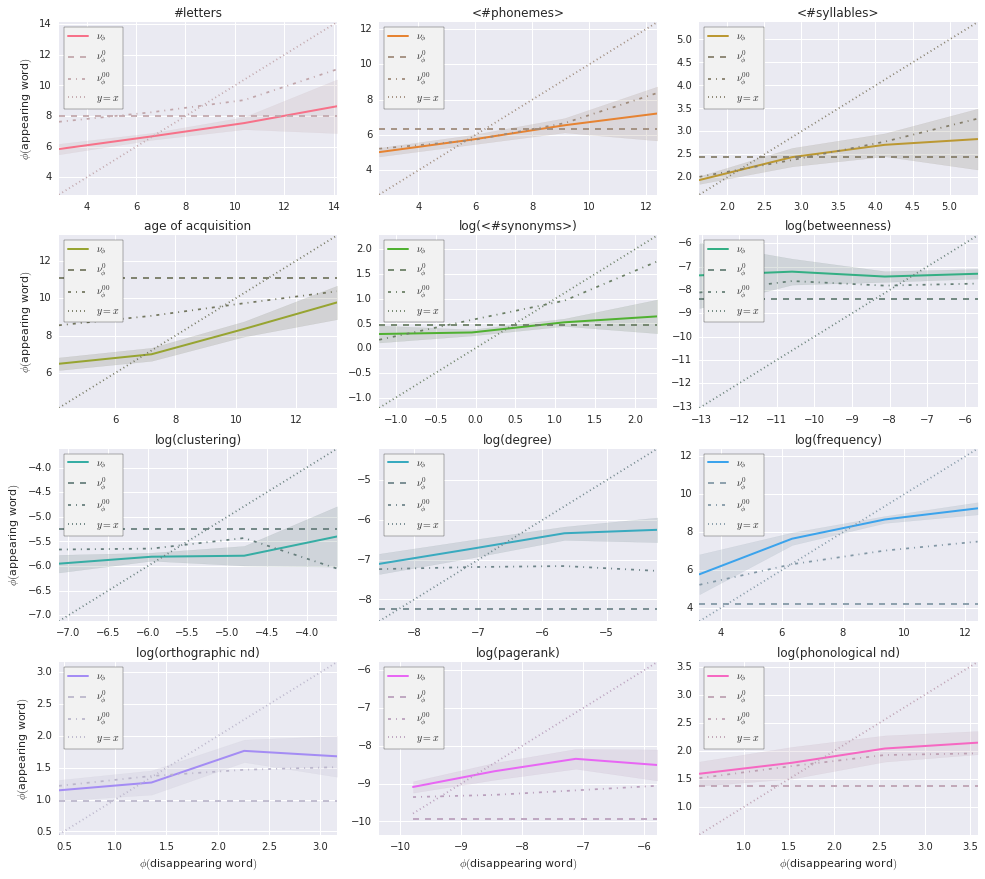

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

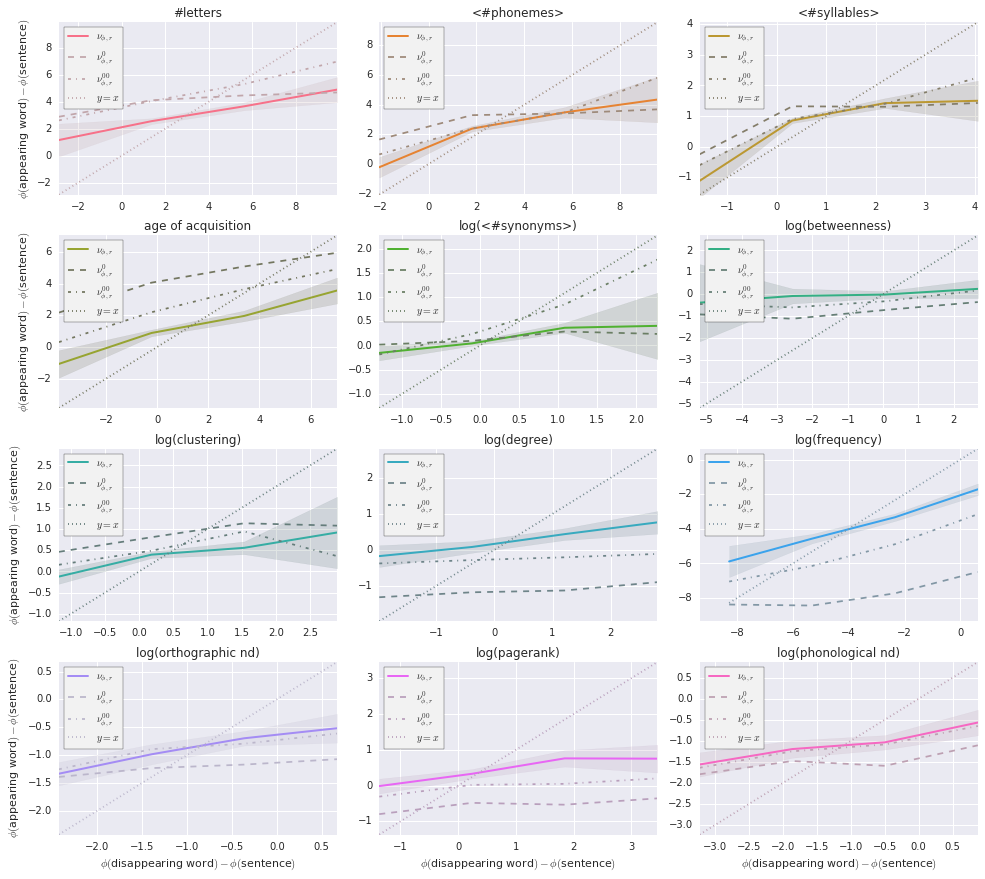

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

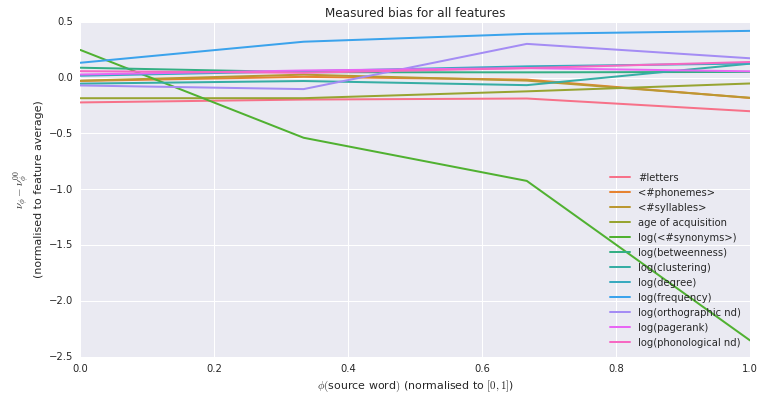

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

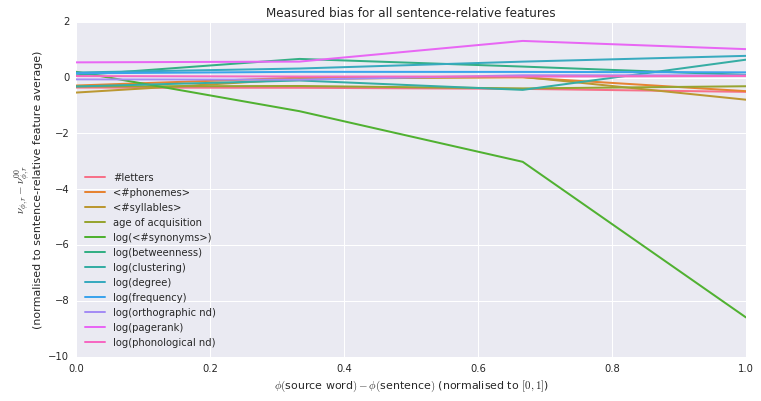

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

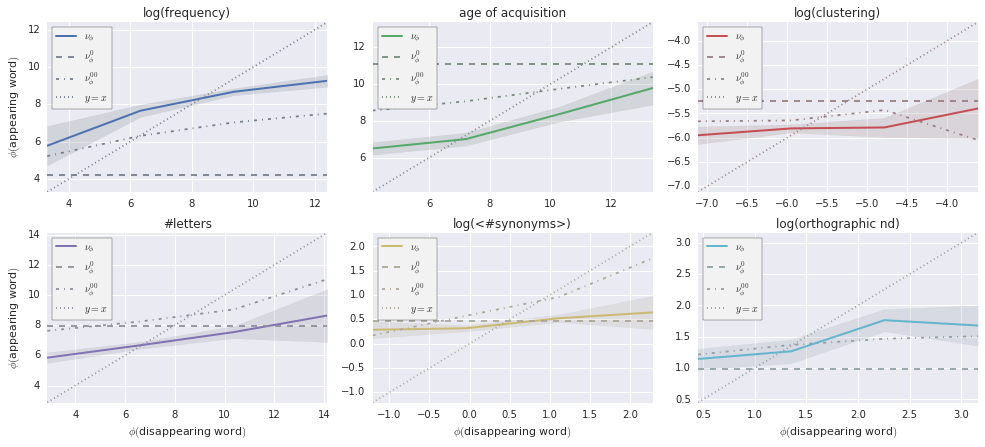

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

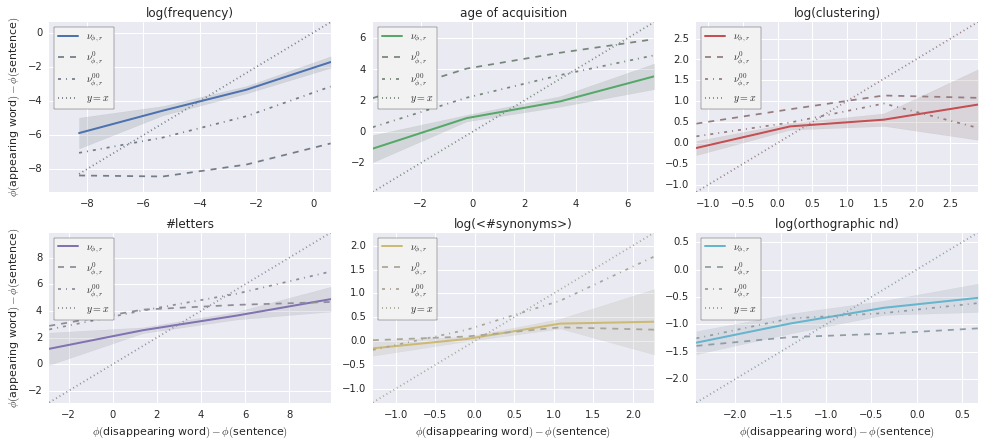

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

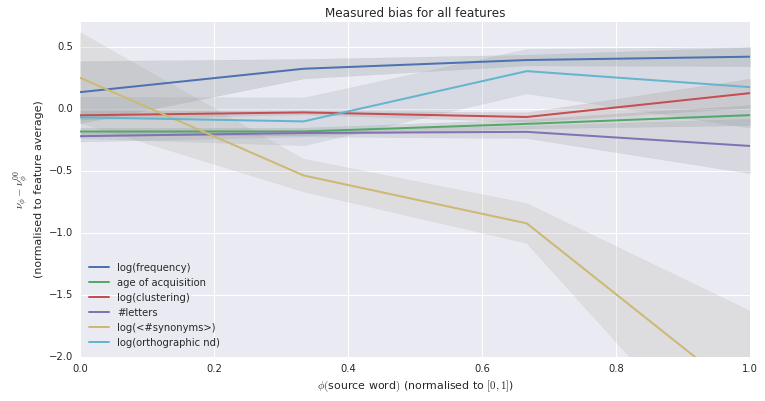

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

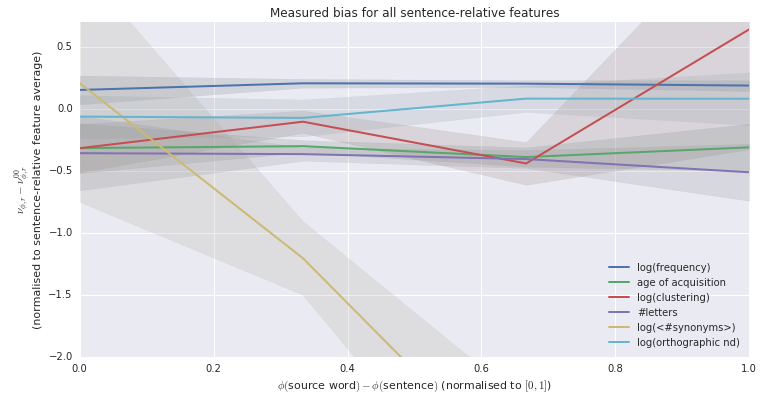

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


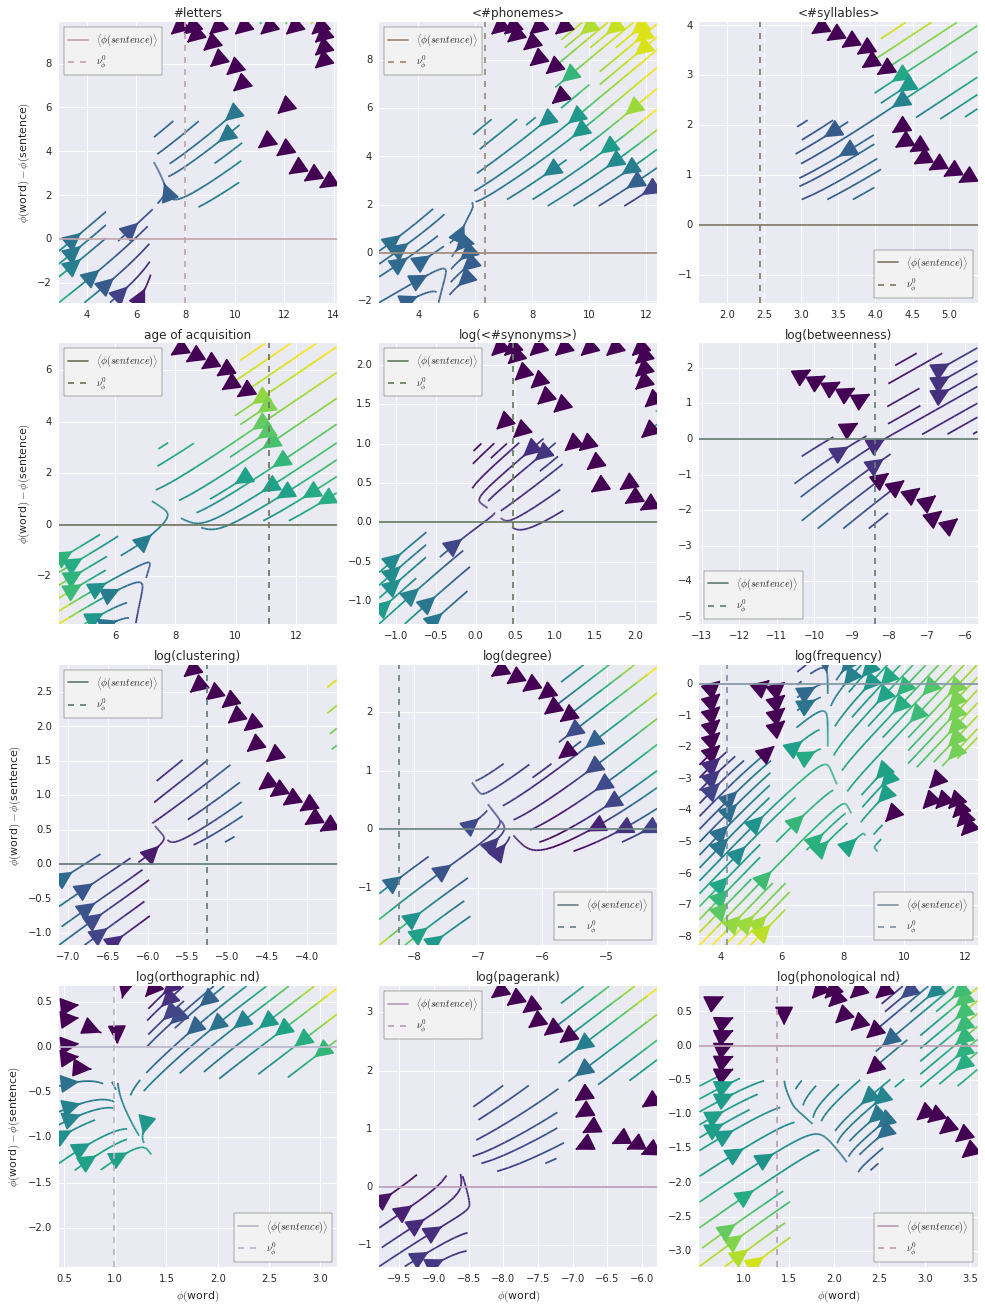

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


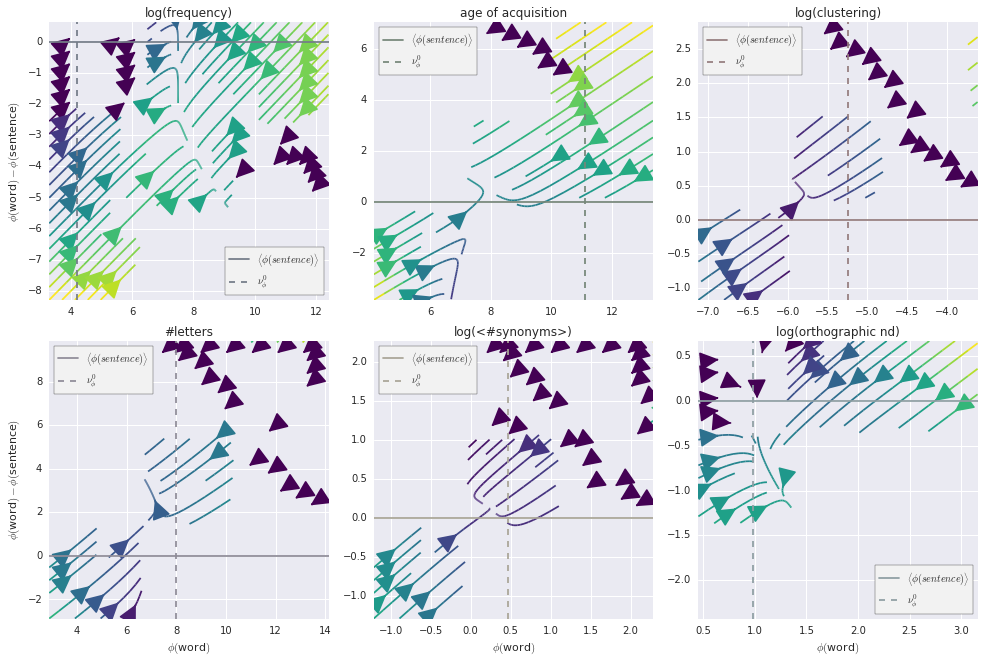

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54034524  0.16133351  0.08746155  0.07136385  0.03546255  0.03039217
  0.01970142  0.017005    0.01617424  0.00882725  0.00711032]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.424365,0.322792,-0.086371,0.253731,0.247127,-0.425529,0.232656,0.301246,-0.392979,0.282465,-0.150217,-0.008460
Component-1,0.295493,-0.378478,0.119609,-0.279861,-0.279761,-0.415574,0.159434,-0.309788,-0.459896,0.251741,-0.171270,0.015565
Component-2,-0.687100,-0.087009,0.120914,-0.048858,-0.698171,0.077989,0.020314,-0.025285,0.047699,-0.049860,-0.008755,0.062457


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 7196) |             | Elapsed Time: 0:00:59 ETA:  4 days, 22:53:39

  1% (  75 of 7196) |                      | Elapsed Time: 0:01:00 ETA:  0:00:36

  1% (  90 of 7196) |                      | Elapsed Time: 0:01:00 ETA:  0:00:38

  2% ( 180 of 7196) |                      | Elapsed Time: 0:01:01 ETA:  0:00:31

  3% ( 270 of 7196) |                      | Elapsed Time: 0:01:02 ETA:  0:00:25

  4% ( 333 of 7196) |#                     | Elapsed Time: 0:01:03 ETA:  0:00:29

  5% ( 360 of 7196) |#                     | Elapsed Time: 0:01:04 ETA:  0:00:31

  5% ( 419 of 7196) |#                     | Elapsed Time: 0:01:05 ETA:  0:00:34

  6% ( 450 of 7196) |#                     | Elapsed Time: 0:01:05 ETA:  0:00:34

  7% ( 512 of 7196) |#                     | Elapsed Time: 0:01:06 ETA:  0:00:36

  7% ( 540 of 7196) |#                     | Elapsed Time: 0:01:07 ETA:  0:00:37

  8% ( 603 of 7196) |#                     | Elapsed Time: 0:01:08 ETA:  0:00:40

  8% ( 630 of 7196) |#                     | Elapsed Time: 0:01:08 ETA:  0:00:40

 10% ( 720 of 7196) |##                    | Elapsed Time: 0:01:09 ETA:  0:00:41

 10% ( 786 of 7196) |##                    | Elapsed Time: 0:01:10 ETA:  0:00:38

 11% ( 810 of 7196) |##                    | Elapsed Time: 0:01:11 ETA:  0:00:36

 12% ( 873 of 7196) |##                    | Elapsed Time: 0:01:12 ETA:  0:00:36

 12% ( 900 of 7196) |##                    | Elapsed Time: 0:01:12 ETA:  0:00:33

 13% ( 990 of 7196) |###                   | Elapsed Time: 0:01:13 ETA:  0:00:25

 15% (1080 of 7196) |###                   | Elapsed Time: 0:01:14 ETA:  0:00:24

 15% (1139 of 7196) |###                   | Elapsed Time: 0:01:15 ETA:  0:00:27

 16% (1170 of 7196) |###                   | Elapsed Time: 0:01:16 ETA:  0:00:27

 17% (1243 of 7196) |###                   | Elapsed Time: 0:01:17 ETA:  0:00:25

 17% (1260 of 7196) |###                   | Elapsed Time: 0:01:17 ETA:  0:00:22

 18% (1330 of 7196) |####                  | Elapsed Time: 0:01:18 ETA:  0:00:23

 18% (1350 of 7196) |####                  | Elapsed Time: 0:01:18 ETA:  0:00:26

 20% (1440 of 7196) |####                  | Elapsed Time: 0:01:19 ETA:  0:00:22

 21% (1530 of 7196) |####                  | Elapsed Time: 0:01:20 ETA:  0:00:15

 22% (1604 of 7196) |####                  | Elapsed Time: 0:01:21 ETA:  0:00:11

 22% (1620 of 7196) |####                  | Elapsed Time: 0:01:22 ETA:  0:00:10

 23% (1710 of 7196) |#####                 | Elapsed Time: 0:01:23 ETA:  0:00:07

 25% (1800 of 7196) |#####                 | Elapsed Time: 0:01:24 ETA:  0:00:08

 26% (1889 of 7196) |#####                 | Elapsed Time: 0:01:25 ETA:  0:00:08

 27% (1979 of 7196) |######                | Elapsed Time: 0:01:26 ETA:  0:00:04

 28% (2069 of 7196) |######                | Elapsed Time: 0:01:27 ETA:  0:00:00

 30% (2159 of 7196) |######                | Elapsed Time: 0:01:28 ETA:  0:00:00

 31% (2249 of 7196) |######                | Elapsed Time: 0:01:29 ETA:  0:00:00

 32% (2339 of 7196) |#######               | Elapsed Time: 0:01:30 ETA:  0:00:00

 33% (2407 of 7196) |#######               | Elapsed Time: 0:01:31 ETA:  0:00:00

 33% (2429 of 7196) |#######               | Elapsed Time: 0:01:32 ETA:  0:00:00

 34% (2498 of 7196) |#######               | Elapsed Time: 0:01:33 ETA:  0:00:00

 35% (2519 of 7196) |#######               | Elapsed Time: 0:01:33 ETA:  0:00:03

 36% (2609 of 7196) |#######               | Elapsed Time: 0:01:34 ETA:  0:00:01

 37% (2699 of 7196) |########              | Elapsed Time: 0:01:35 ETA:  0:00:00

 38% (2768 of 7196) |########              | Elapsed Time: 0:01:36 ETA:  0:00:00

 38% (2789 of 7196) |########              | Elapsed Time: 0:01:37 ETA:  0:00:00

 40% (2879 of 7196) |########              | Elapsed Time: 0:01:38 ETA:  0:00:00

 41% (2969 of 7196) |#########             | Elapsed Time: 0:01:39 ETA:  0:00:00

 42% (3059 of 7196) |#########             | Elapsed Time: 0:01:40 ETA:  0:00:00

 43% (3131 of 7196) |#########             | Elapsed Time: 0:01:41 ETA:  0:00:00

 43% (3149 of 7196) |#########             | Elapsed Time: 0:01:41 ETA:  0:00:00

 44% (3225 of 7196) |#########             | Elapsed Time: 0:01:42 ETA:  0:00:00

 45% (3239 of 7196) |#########             | Elapsed Time: 0:01:43 ETA:  0:00:00

 46% (3329 of 7196) |##########            | Elapsed Time: 0:01:44 ETA:  0:00:00

 47% (3393 of 7196) |##########            | Elapsed Time: 0:01:45 ETA:  0:00:00

 47% (3419 of 7196) |##########            | Elapsed Time: 0:01:45 ETA:  0:00:00

 48% (3492 of 7196) |##########            | Elapsed Time: 0:01:46 ETA:  0:00:00

 48% (3509 of 7196) |##########            | Elapsed Time: 0:01:46 ETA:  0:00:00

 50% (3599 of 7196) |###########           | Elapsed Time: 0:01:47 ETA:  0:00:00

 51% (3688 of 7196) |###########           | Elapsed Time: 0:01:49 ETA:  0:00:00

 52% (3778 of 7196) |###########           | Elapsed Time: 0:01:50 ETA:  0:00:00

 53% (3849 of 7196) |###########           | Elapsed Time: 0:01:51 ETA:  0:00:00

 53% (3868 of 7196) |###########           | Elapsed Time: 0:01:51 ETA:  0:00:00

 55% (3958 of 7196) |############          | Elapsed Time: 0:01:52 ETA:  0:00:00

 55% (4014 of 7196) |############          | Elapsed Time: 0:01:53 ETA:  0:00:00

 56% (4048 of 7196) |############          | Elapsed Time: 0:01:54 ETA:  0:00:00

 57% (4121 of 7196) |############          | Elapsed Time: 0:01:55 ETA:  0:00:00

 57% (4138 of 7196) |############          | Elapsed Time: 0:01:55 ETA:  0:00:00

 58% (4207 of 7196) |############          | Elapsed Time: 0:01:56 ETA:  0:00:00

 58% (4228 of 7196) |############          | Elapsed Time: 0:01:56 ETA:  0:00:00

 60% (4318 of 7196) |#############         | Elapsed Time: 0:01:57 ETA:  0:00:00

 61% (4408 of 7196) |#############         | Elapsed Time: 0:01:58 ETA:  0:00:00

 62% (4498 of 7196) |#############         | Elapsed Time: 0:01:59 ETA:  0:00:00

 63% (4588 of 7196) |##############        | Elapsed Time: 0:02:00 ETA:  0:00:00

 65% (4678 of 7196) |##############        | Elapsed Time: 0:02:02 ETA:  0:00:00

 66% (4768 of 7196) |##############        | Elapsed Time: 0:02:03 ETA:  0:00:00

 67% (4858 of 7196) |##############        | Elapsed Time: 0:02:04 ETA:  0:00:00

 68% (4936 of 7196) |###############       | Elapsed Time: 0:02:05 ETA:  0:00:00

 68% (4948 of 7196) |###############       | Elapsed Time: 0:02:05 ETA:  0:00:00

 69% (5014 of 7196) |###############       | Elapsed Time: 0:02:06 ETA:  0:00:00

 70% (5038 of 7196) |###############       | Elapsed Time: 0:02:06 ETA:  0:00:00

 71% (5112 of 7196) |###############       | Elapsed Time: 0:02:07 ETA:  0:00:00

 71% (5128 of 7196) |###############       | Elapsed Time: 0:02:08 ETA:  0:00:00

 72% (5218 of 7196) |###############       | Elapsed Time: 0:02:09 ETA:  0:00:00

 73% (5290 of 7196) |################      | Elapsed Time: 0:02:10 ETA:  0:00:00

 73% (5308 of 7196) |################      | Elapsed Time: 0:02:10 ETA:  0:00:00

 75% (5398 of 7196) |################      | Elapsed Time: 0:02:11 ETA:  0:00:00

 76% (5471 of 7196) |################      | Elapsed Time: 0:02:12 ETA:  0:00:00

 76% (5487 of 7196) |################      | Elapsed Time: 0:02:12 ETA:  0:00:00

 77% (5577 of 7196) |#################     | Elapsed Time: 0:02:13 ETA:  0:00:00

 78% (5649 of 7196) |#################     | Elapsed Time: 0:02:14 ETA:  0:00:00

 78% (5667 of 7196) |#################     | Elapsed Time: 0:02:15 ETA:  0:00:00

 80% (5757 of 7196) |#################     | Elapsed Time: 0:02:16 ETA:  0:00:00

 80% (5827 of 7196) |#################     | Elapsed Time: 0:02:17 ETA:  0:00:00

 81% (5847 of 7196) |#################     | Elapsed Time: 0:02:17 ETA:  0:00:00

 82% (5937 of 7196) |##################    | Elapsed Time: 0:02:18 ETA:  0:00:00

 83% (6027 of 7196) |##################    | Elapsed Time: 0:02:19 ETA:  0:00:00

 85% (6117 of 7196) |##################    | Elapsed Time: 0:02:20 ETA:  0:00:00

 86% (6207 of 7196) |##################    | Elapsed Time: 0:02:21 ETA:  0:00:00

 87% (6297 of 7196) |###################   | Elapsed Time: 0:02:22 ETA:  0:00:00

 88% (6387 of 7196) |###################   | Elapsed Time: 0:02:23 ETA:  0:00:00

 89% (6466 of 7196) |###################   | Elapsed Time: 0:02:24 ETA:  0:00:00

 90% (6477 of 7196) |###################   | Elapsed Time: 0:02:25 ETA:  0:00:00

 91% (6567 of 7196) |####################  | Elapsed Time: 0:02:26 ETA:  0:00:00

 92% (6626 of 7196) |####################  | Elapsed Time: 0:02:27 ETA:  0:00:00

 92% (6657 of 7196) |####################  | Elapsed Time: 0:02:27 ETA:  0:00:00

 93% (6747 of 7196) |####################  | Elapsed Time: 0:02:28 ETA:  0:00:00

 95% (6837 of 7196) |####################  | Elapsed Time: 0:02:29 ETA:  0:00:00

 96% (6927 of 7196) |##################### | Elapsed Time: 0:02:31 ETA:  0:00:00

 97% (6993 of 7196) |##################### | Elapsed Time: 0:02:32 ETA:  0:00:00

 97% (7017 of 7196) |##################### | Elapsed Time: 0:02:32 ETA:  0:00:00

 98% (7089 of 7196) |##################### | Elapsed Time: 0:02:33 ETA:  0:00:00

 98% (7107 of 7196) |##################### | Elapsed Time: 0:02:33 ETA:  0:00:00

100% (7196 of 7196) |######################| Elapsed Time: 0:02:34 Time: 0:02:34


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

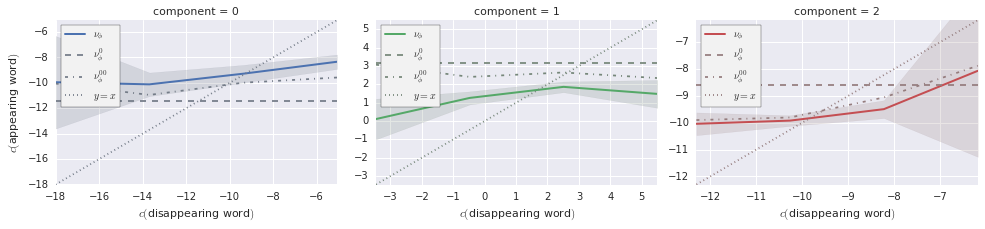

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.54896385  0.1728104   0.16351698]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.659751,-0.103268,0.360878,-0.569291,0.315809,0.002198
Component-1,0.421435,0.075898,-0.522893,-0.688958,0.260949,-0.021376
Component-2,-0.614174,0.112064,-0.753862,0.192372,-0.038600,0.058534


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 7196) |               | Elapsed Time: 0:00:16 ETA:  1 day, 8:22:19

  1% (  90 of 7196) |                      | Elapsed Time: 0:00:17 ETA:  0:01:06

  2% ( 180 of 7196) |                      | Elapsed Time: 0:00:18 ETA:  0:01:00

  3% ( 270 of 7196) |                      | Elapsed Time: 0:00:19 ETA:  0:00:57

  4% ( 340 of 7196) |#                     | Elapsed Time: 0:00:20 ETA:  0:01:02

  5% ( 360 of 7196) |#                     | Elapsed Time: 0:00:20 ETA:  0:01:03

  5% ( 428 of 7196) |#                     | Elapsed Time: 0:00:21 ETA:  0:01:06

  6% ( 450 of 7196) |#                     | Elapsed Time: 0:00:21 ETA:  0:01:06

  7% ( 516 of 7196) |#                     | Elapsed Time: 0:00:22 ETA:  0:01:08

  7% ( 540 of 7196) |#                     | Elapsed Time: 0:00:23 ETA:  0:01:11

  8% ( 610 of 7196) |#                     | Elapsed Time: 0:00:24 ETA:  0:01:11

  8% ( 630 of 7196) |#                     | Elapsed Time: 0:00:24 ETA:  0:01:15

 10% ( 720 of 7196) |##                    | Elapsed Time: 0:00:25 ETA:  0:01:18

 10% ( 788 of 7196) |##                    | Elapsed Time: 0:00:26 ETA:  0:01:17

 11% ( 810 of 7196) |##                    | Elapsed Time: 0:00:26 ETA:  0:01:17

 12% ( 878 of 7196) |##                    | Elapsed Time: 0:00:27 ETA:  0:01:16

 12% ( 900 of 7196) |##                    | Elapsed Time: 0:00:28 ETA:  0:01:14

 13% ( 990 of 7196) |###                   | Elapsed Time: 0:00:29 ETA:  0:01:08

 15% (1080 of 7196) |###                   | Elapsed Time: 0:00:30 ETA:  0:01:07

 16% (1152 of 7196) |###                   | Elapsed Time: 0:00:31 ETA:  0:01:06

 16% (1170 of 7196) |###                   | Elapsed Time: 0:00:31 ETA:  0:01:04

 17% (1260 of 7196) |###                   | Elapsed Time: 0:00:32 ETA:  0:00:59

 18% (1350 of 7196) |####                  | Elapsed Time: 0:00:33 ETA:  0:00:59

 20% (1440 of 7196) |####                  | Elapsed Time: 0:00:35 ETA:  0:00:55

 21% (1530 of 7196) |####                  | Elapsed Time: 0:00:35 ETA:  0:00:52

 22% (1620 of 7196) |####                  | Elapsed Time: 0:00:37 ETA:  0:00:49

 23% (1710 of 7196) |#####                 | Elapsed Time: 0:00:38 ETA:  0:00:48

 25% (1800 of 7196) |#####                 | Elapsed Time: 0:00:39 ETA:  0:00:47

 26% (1889 of 7196) |#####                 | Elapsed Time: 0:00:40 ETA:  0:00:46

 27% (1979 of 7196) |######                | Elapsed Time: 0:00:41 ETA:  0:00:46

 28% (2069 of 7196) |######                | Elapsed Time: 0:00:42 ETA:  0:00:42

 30% (2159 of 7196) |######                | Elapsed Time: 0:00:43 ETA:  0:00:40

 31% (2249 of 7196) |######                | Elapsed Time: 0:00:44 ETA:  0:00:37

 32% (2339 of 7196) |#######               | Elapsed Time: 0:00:45 ETA:  0:00:36

 33% (2429 of 7196) |#######               | Elapsed Time: 0:00:46 ETA:  0:00:36

 35% (2519 of 7196) |#######               | Elapsed Time: 0:00:47 ETA:  0:00:37

 36% (2609 of 7196) |#######               | Elapsed Time: 0:00:48 ETA:  0:00:37

 37% (2699 of 7196) |########              | Elapsed Time: 0:00:49 ETA:  0:00:35

 38% (2789 of 7196) |########              | Elapsed Time: 0:00:50 ETA:  0:00:35

 40% (2879 of 7196) |########              | Elapsed Time: 0:00:51 ETA:  0:00:33

 41% (2969 of 7196) |#########             | Elapsed Time: 0:00:53 ETA:  0:00:31

 42% (3059 of 7196) |#########             | Elapsed Time: 0:00:54 ETA:  0:00:28

 43% (3149 of 7196) |#########             | Elapsed Time: 0:00:55 ETA:  0:00:28

 45% (3239 of 7196) |#########             | Elapsed Time: 0:00:56 ETA:  0:00:27

 46% (3329 of 7196) |##########            | Elapsed Time: 0:00:57 ETA:  0:00:27

 47% (3394 of 7196) |##########            | Elapsed Time: 0:00:58 ETA:  0:00:29

 47% (3419 of 7196) |##########            | Elapsed Time: 0:00:58 ETA:  0:00:29

 48% (3509 of 7196) |##########            | Elapsed Time: 0:00:59 ETA:  0:00:31

 50% (3599 of 7196) |###########           | Elapsed Time: 0:01:00 ETA:  0:00:27

 51% (3688 of 7196) |###########           | Elapsed Time: 0:01:01 ETA:  0:00:25

 52% (3778 of 7196) |###########           | Elapsed Time: 0:01:02 ETA:  0:00:23

 53% (3868 of 7196) |###########           | Elapsed Time: 0:01:03 ETA:  0:00:18

 55% (3958 of 7196) |############          | Elapsed Time: 0:01:04 ETA:  0:00:14

 55% (4019 of 7196) |############          | Elapsed Time: 0:01:05 ETA:  0:00:17

 56% (4048 of 7196) |############          | Elapsed Time: 0:01:06 ETA:  0:00:19

 57% (4138 of 7196) |############          | Elapsed Time: 0:01:07 ETA:  0:00:20

 58% (4228 of 7196) |############          | Elapsed Time: 0:01:08 ETA:  0:00:21

 60% (4318 of 7196) |#############         | Elapsed Time: 0:01:09 ETA:  0:00:18

 61% (4408 of 7196) |#############         | Elapsed Time: 0:01:10 ETA:  0:00:15

 62% (4498 of 7196) |#############         | Elapsed Time: 0:01:11 ETA:  0:00:12

 63% (4588 of 7196) |##############        | Elapsed Time: 0:01:12 ETA:  0:00:08

 65% (4678 of 7196) |##############        | Elapsed Time: 0:01:13 ETA:  0:00:06

 66% (4768 of 7196) |##############        | Elapsed Time: 0:01:14 ETA:  0:00:04

 67% (4858 of 7196) |##############        | Elapsed Time: 0:01:15 ETA:  0:00:03

 68% (4948 of 7196) |###############       | Elapsed Time: 0:01:16 ETA:  0:00:04

 70% (5038 of 7196) |###############       | Elapsed Time: 0:01:17 ETA:  0:00:03

 71% (5128 of 7196) |###############       | Elapsed Time: 0:01:18 ETA:  0:00:01

 72% (5218 of 7196) |###############       | Elapsed Time: 0:01:19 ETA:  0:00:00

 73% (5308 of 7196) |################      | Elapsed Time: 0:01:20 ETA:  0:00:01

 75% (5398 of 7196) |################      | Elapsed Time: 0:01:21 ETA:  0:00:00

 76% (5487 of 7196) |################      | Elapsed Time: 0:01:22 ETA:  0:00:00

 77% (5577 of 7196) |#################     | Elapsed Time: 0:01:23 ETA:  0:00:00

 78% (5667 of 7196) |#################     | Elapsed Time: 0:01:24 ETA:  0:00:00

 80% (5757 of 7196) |#################     | Elapsed Time: 0:01:25 ETA:  0:00:00

 81% (5847 of 7196) |#################     | Elapsed Time: 0:01:26 ETA:  0:00:00

 82% (5937 of 7196) |##################    | Elapsed Time: 0:01:27 ETA:  0:00:00

 83% (6027 of 7196) |##################    | Elapsed Time: 0:01:28 ETA:  0:00:00

 85% (6117 of 7196) |##################    | Elapsed Time: 0:01:29 ETA:  0:00:00

 86% (6207 of 7196) |##################    | Elapsed Time: 0:01:30 ETA:  0:00:00

 87% (6297 of 7196) |###################   | Elapsed Time: 0:01:31 ETA:  0:00:00

 88% (6387 of 7196) |###################   | Elapsed Time: 0:01:32 ETA:  0:00:00

 90% (6477 of 7196) |###################   | Elapsed Time: 0:01:33 ETA:  0:00:00

 91% (6567 of 7196) |####################  | Elapsed Time: 0:01:34 ETA:  0:00:00

 92% (6642 of 7196) |####################  | Elapsed Time: 0:01:35 ETA:  0:00:00

 92% (6657 of 7196) |####################  | Elapsed Time: 0:01:35 ETA:  0:00:00

 93% (6747 of 7196) |####################  | Elapsed Time: 0:01:36 ETA:  0:00:00

 95% (6837 of 7196) |####################  | Elapsed Time: 0:01:37 ETA:  0:00:00

 96% (6927 of 7196) |##################### | Elapsed Time: 0:01:38 ETA:  0:00:00

 97% (7017 of 7196) |##################### | Elapsed Time: 0:01:39 ETA:  0:00:00

 98% (7107 of 7196) |##################### | Elapsed Time: 0:01:40 ETA:  0:00:00

100% (7196 of 7196) |######################| Elapsed Time: 0:01:41 Time: 0:01:41


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

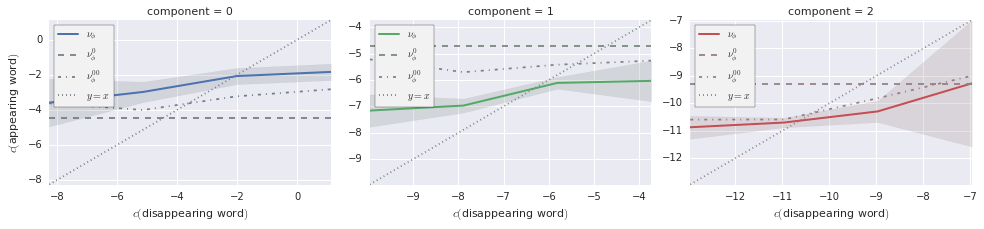

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 876 (cluster-unique) substitutions, but the PCA is in fact computed on 339 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.